# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import os
import time
from random import uniform
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

from scipy.stats import linregress
from citipy import citipy
from pprint import pprint

from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

# generate random coordinates
while len(cities) < 600:
    x, y = uniform(-180,180), uniform(-90, 90)
    city = citipy.nearest_city(x, y).city_name
    city = city.title()
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# set starting count and set for display
count = 0
Set = 1

# Create cities dataframe
cities_df=pd.DataFrame(cities)
cities_df=cities_df.rename(columns={0:"City"})
cities_df["Lat"]=""
cities_df["Lng"]=""
cities_df["Max Temp"]=""
cities_df["Humidity"]=""
cities_df["Cloudiness"]=""
cities_df["Wind Speed"]=""
cities_df["Country"]=""
cities_df["Date"]=""

# Create URL and determine units
url = 'http://api.openweathermap.org/data/2.5/weather?q='

# print initial message
print('Beginning Data Retrieval')
print('------------------------------')


# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
#     time.sleep(0.005)
    merge_url = url + row["City"] + "&appid=" + weather_api_key + "&units=metric"
    city_data = requests.get(merge_url).json()
    try:
        print(f'Processing Record {count+1} of Set {Set} | {row["City"]}')
        # inserting data into corresponding columns
        cities_df.loc[index,"Lat"]=city_data["coord"]["lat"]
        cities_df.loc[index,"Lng"]=city_data["coord"]["lon"]
        cities_df.loc[index,"Max Temp"]=city_data["main"]["temp"]
        cities_df.loc[index,"Humidity"]=city_data["main"]["humidity"]
        cities_df.loc[index,"Cloudiness"]=city_data["clouds"]["all"]
        cities_df.loc[index,"Wind Speed"]=city_data["wind"]["speed"]
        cities_df.loc[index,"Country"]=city_data["sys"]["country"]
        cities_df.loc[index,"Date"]=city_data["dt"]
        count += 1
        if count % 50 == 0:
            Set = Set + 1
            count = 0
    except:
        print(f'City "{row["City"]}" not found. Skipping...')
        cities_df=cities_df.drop(index)

# Print last ending message
print("-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | Port Alfred
Processing Record 2 of Set 1 | Georgetown
Processing Record 3 of Set 1 | Cape Town
Processing Record 4 of Set 1 | Bredasdorp
Processing Record 5 of Set 1 | Sao Filipe
Processing Record 6 of Set 1 | Busselton
Processing Record 7 of Set 1 | Ushuaia
Processing Record 8 of Set 1 | Saint George
Processing Record 9 of Set 1 | Qaanaaq
Processing Record 10 of Set 1 | Mahebourg
Processing Record 11 of Set 1 | Chapais
Processing Record 12 of Set 1 | Hermanus
Processing Record 13 of Set 1 | Upernavik
Processing Record 14 of Set 1 | Narsaq
Processing Record 15 of Set 1 | Belushya Guba
City "Belushya Guba" not found. Skipping...
Processing Record 15 of Set 1 | Saryshagan
City "Saryshagan" not found. Skipping...
Processing Record 15 of Set 1 | East London
Processing Record 16 of Set 1 | Banda Aceh
Processing Record 17 of Set 1 | Barentsburg
City "Barentsburg" not found. Skipping...
Processing Record 17

Processing Record 6 of Set 4 | Hualmay
Processing Record 7 of Set 4 | Chincha Alta
Processing Record 8 of Set 4 | Domazlice
Processing Record 9 of Set 4 | Bhadrachalam
Processing Record 10 of Set 4 | Ozgon
City "Ozgon" not found. Skipping...
Processing Record 10 of Set 4 | Kindu
Processing Record 11 of Set 4 | Victoria
Processing Record 12 of Set 4 | Pisco
Processing Record 13 of Set 4 | Lidkoping
Processing Record 14 of Set 4 | Cidreira
Processing Record 15 of Set 4 | Karpenision
City "Karpenision" not found. Skipping...
Processing Record 15 of Set 4 | Torbay
Processing Record 16 of Set 4 | Salalah
Processing Record 17 of Set 4 | Tambacounda
Processing Record 18 of Set 4 | Mizdah
Processing Record 19 of Set 4 | Torres
Processing Record 20 of Set 4 | Marsh Harbour
Processing Record 21 of Set 4 | Arona
Processing Record 22 of Set 4 | Ermelo
Processing Record 23 of Set 4 | Muskegon
Processing Record 24 of Set 4 | Puerto Narino
Processing Record 25 of Set 4 | Stokmarknes
Processing Record

Processing Record 19 of Set 7 | Lagos
Processing Record 20 of Set 7 | Doha
Processing Record 21 of Set 7 | Cobija
Processing Record 22 of Set 7 | Salinopolis
Processing Record 23 of Set 7 | Kamenka
Processing Record 24 of Set 7 | Iberia
Processing Record 25 of Set 7 | Bathsheba
Processing Record 26 of Set 7 | Sorvag
City "Sorvag" not found. Skipping...
Processing Record 26 of Set 7 | Sambava
Processing Record 27 of Set 7 | Songea
Processing Record 28 of Set 7 | Souillac
Processing Record 29 of Set 7 | Bulawayo
Processing Record 30 of Set 7 | Calama
Processing Record 31 of Set 7 | San Bartolome De Tirajana
Processing Record 32 of Set 7 | Araouane
Processing Record 33 of Set 7 | Sinkat
City "Sinkat" not found. Skipping...
Processing Record 33 of Set 7 | San Rafael
Processing Record 34 of Set 7 | Camacha
Processing Record 35 of Set 7 | Valparaiso
Processing Record 36 of Set 7 | Abengourou
Processing Record 37 of Set 7 | Saint-Pierre
Processing Record 38 of Set 7 | Westpunt
City "Westpunt"

Processing Record 45 of Set 10 | Cerro Cama
Processing Record 46 of Set 10 | Piacabucu
Processing Record 47 of Set 10 | Nokaneng
Processing Record 48 of Set 10 | Dewas
Processing Record 49 of Set 10 | Puri
Processing Record 50 of Set 10 | Thinadhoo
Processing Record 1 of Set 11 | Abu Dhabi
Processing Record 2 of Set 11 | Erzincan
Processing Record 3 of Set 11 | Bahia Blanca
Processing Record 4 of Set 11 | Camopi
Processing Record 5 of Set 11 | Buxton
Processing Record 6 of Set 11 | Plouzane
Processing Record 7 of Set 11 | Gazanjyk
Processing Record 8 of Set 11 | Khanewal
Processing Record 9 of Set 11 | Shadegan
Processing Record 10 of Set 11 | Louisbourg
City "Louisbourg" not found. Skipping...
Processing Record 10 of Set 11 | Mount Vernon
Processing Record 11 of Set 11 | Beira
Processing Record 12 of Set 11 | Matay
Processing Record 13 of Set 11 | Saquarema
Processing Record 14 of Set 11 | Codajas
Processing Record 15 of Set 11 | Bargal
City "Bargal" not found. Skipping...
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Write dataframe to csv
cities_df.to_csv(r'output_data/Cities_Data.csv',index=False)

# Copy CSV to dataframe
csv_df = pd.read_csv("output_data/Cities_Data.csv")
csv_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,19.72,79,0,8.55,ZA,1602778556
1,Georgetown,5.41,100.34,27.89,83,20,2.60,MY,1602778259
2,Cape Town,-33.93,18.42,17.19,72,25,10.30,ZA,1602778557
3,Bredasdorp,-34.53,20.04,17.00,72,23,4.10,ZA,1602778557
4,Sao Filipe,14.90,-24.50,28.71,70,100,3.95,CV,1602778557


In [5]:
# display summary table
csv_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,18.971188,0.619214,20.414497,62.385740,44.934186,3.762011,1.602779e+09
std,31.561602,55.748990,10.274533,23.990444,37.083650,2.331840,6.740616e+01
min,-54.800000,-121.980000,-4.000000,6.000000,0.000000,0.280000,1.602778e+09
25%,-6.950000,-53.545000,12.195000,47.000000,4.000000,2.100000,1.602779e+09
50%,20.930000,12.980000,22.000000,67.000000,40.000000,3.400000,1.602779e+09
75%,44.880000,37.800000,28.000000,80.000000,77.000000,4.865000,1.602779e+09
max,78.220000,168.940000,42.000000,100.000000,100.000000,16.500000,1.602779e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humid100 = csv_df[csv_df.Humidity > 100].index
humid100
# no city with humidity > 100%

Int64Index([], dtype='int64')

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = csv_df.drop(csv_df.index[humid100], inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,19.72,79,0,8.55,ZA,1602778556
1,Georgetown,5.41,100.34,27.89,83,20,2.60,MY,1602778259
2,Cape Town,-33.93,18.42,17.19,72,25,10.30,ZA,1602778557
3,Bredasdorp,-34.53,20.04,17.00,72,23,4.10,ZA,1602778557
4,Sao Filipe,14.90,-24.50,28.71,70,100,3.95,CV,1602778557
...,...,...,...,...,...,...,...,...,...
542,Krasnoselkup,65.70,82.47,-1.42,95,99,6.32,RU,1602778739
543,Oktyabrskoye,43.06,44.74,15.78,59,98,2.00,RU,1602778739
544,Aksarka,66.56,67.80,-0.66,93,28,6.13,RU,1602778740
545,Buraydah,26.33,43.98,32.00,19,0,4.10,SA,1602778740


In [25]:
# confirm the maximum humidity in the clean_city_data
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,18.971188,0.619214,20.414497,62.385740,44.934186,3.762011,1.602779e+09
std,31.561602,55.748990,10.274533,23.990444,37.083650,2.331840,6.740616e+01
min,-54.800000,-121.980000,-4.000000,6.000000,0.000000,0.280000,1.602778e+09
25%,-6.950000,-53.545000,12.195000,47.000000,4.000000,2.100000,1.602779e+09
50%,20.930000,12.980000,22.000000,67.000000,40.000000,3.400000,1.602779e+09
75%,44.880000,37.800000,28.000000,80.000000,77.000000,4.865000,1.602779e+09
max,78.220000,168.940000,42.000000,100.000000,100.000000,16.500000,1.602779e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

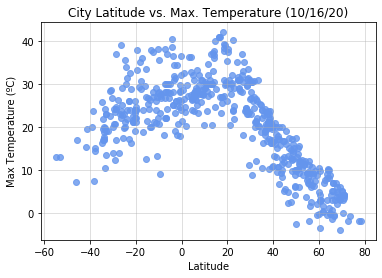

In [26]:
# capture the date that the script would run
date=time.strftime('%m/%d/%y')

plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (ºC)')
plt.title(f"City Latitude vs. Max. Temperature ({date})")

plt.savefig('output_data/Fig 1 - Lat_vs_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

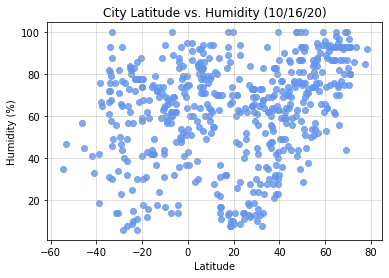

In [27]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

plt.savefig('output_data/Fig 2 - Lat_vs_Hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

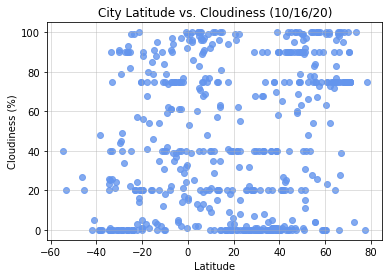

In [28]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")

plt.savefig('output_data/Fig 3 - Lat_vs_Cld.png')
plt.show()

## Latitude vs. Wind Speed Plot

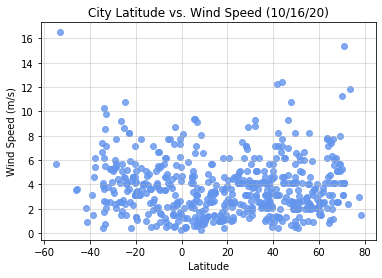

In [29]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")

plt.savefig('output_data/Fig 4 - Lat_vs_Wnd.png')
plt.show()

## Linear Regression

In [30]:
# split dataframe into northern and southern hemisphere
n_csv = clean_city_data[clean_city_data["Lat"]>=0]
s_csv = clean_city_data[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7624128100938902


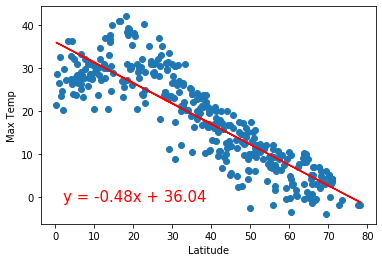

In [31]:
x_values = n_csv["Lat"]
y_values = n_csv["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.23686561380270338


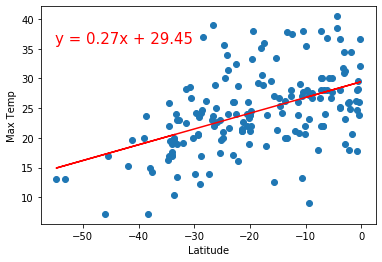

In [32]:
x_values = s_csv["Lat"]
y_values = s_csv["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10488449517783112


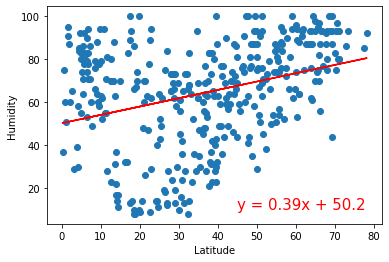

In [33]:
x_values = n_csv["Lat"]
y_values = n_csv["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011921943951405901


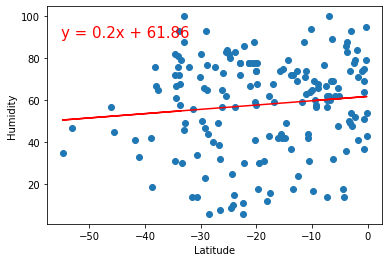

In [34]:
x_values = s_csv["Lat"]
y_values = s_csv["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.044622457684556825


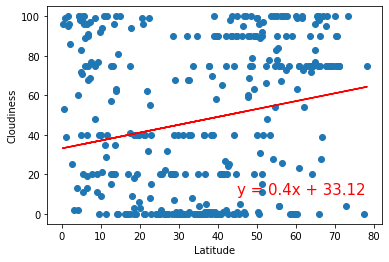

In [35]:
x_values = n_csv["Lat"]
y_values = n_csv["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09026545898874289


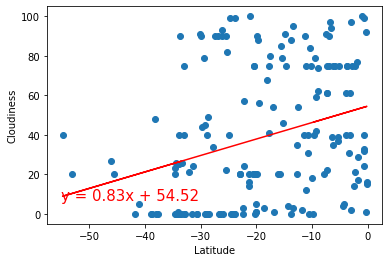

In [36]:
x_values = s_csv["Lat"]
y_values = s_csv["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.031429938222720936


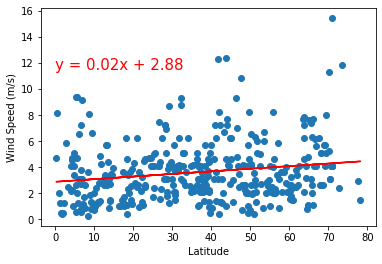

In [37]:
x_values = n_csv["Lat"]
y_values = n_csv["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,11.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.050341188753084055


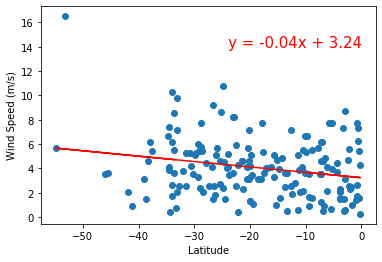

In [38]:
x_values = s_csv["Lat"]
y_values = s_csv["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-24,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r-value is: {rvalue**2}")
plt.show()